In [70]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [71]:
import csv
data = []
with open("cleaned/FL.csv", "r", encoding="utf-8") as f:
    csv_reader = csv.reader(f, delimiter=',')
    headers = next(csv_reader)
    for i in csv_reader:
        data.append(int(i[5]))

train  = data[:-300]
test = data[-300:]

print(len(train))
print(len(test))


li_x = []
li_y = []
seq = 7


# 因为数据集较少，序列长度太长会影响结果
for i in range(len(train) - seq):
    # 输入就是[x,x+1]天的数据，输出时x+2天的数据
    li_x.append(train[i: i+seq])
    li_y.append(train[i+seq])

t_x = []
t_y = []
# 因为数据集较少，序列长度太长会影响结果
for i in range(len(test) - seq):
    # 输入就是[x,x+1]天的数据，输出时x+2天的数据*
    t_x.append(test[i: i+seq])
    t_y.append(test[i+seq])



# # 分训练和测试集
# train_x = (torch.tensor(li_x[:-30]).float() / 1000.).reshape(-1, seq, 1).to(device)
# train_y = (torch.tensor(li_y[:-30]).float() / 1000.).reshape(-1, 1).to(device)

# print(train_x.shape)

# test_x = (torch.tensor(t_x[-30:]).float() / 1000.).reshape(-1, seq, 1).to(device)
# test_y = (torch.tensor(t_y[-30:]).float() / 1000.).reshape(-1, 1).to(device)


# 分训练和测试集
train_x = (torch.tensor(li_x).float() / 1000.).reshape(-1, seq, 1).to(device)
train_y = (torch.tensor(li_y).float() / 1000.).reshape(-1, 1).to(device)

print(train_x.shape)

test_x = (torch.tensor(t_x).float() / 1000.).reshape(-1, seq, 1).to(device)
test_y = (torch.tensor(t_y).float() / 1000.).reshape(-1, 1).to(device)

# print(test_x)
# print(test_y)

410
300
torch.Size([403, 7, 1])


([<matplotlib.axis.XTick at 0x1ad0556e668>,
 <a list of 8 Text xticklabel objects>)

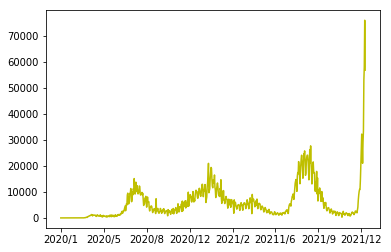

In [72]:
data_sample = data
x = np.array([i for i in range(len(data_sample))])
y = data_sample

plt.plot(
    x,
    y,
    color="y"
)
plt.xticks(
    [0,100,200,300,400,500,600,700],
    ['2020/1','2020/5', '2020/8', '2020/12', '2021/2', '20211/6', '2021/9', '2021/12']
)

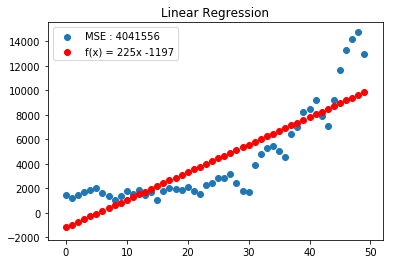

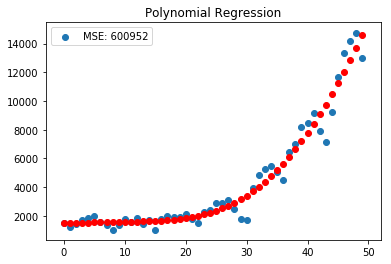

In [81]:
# 多项式回归分析 250～400 之间的数据\
import csv
data = []
with open("cleaned/FL.csv", "r", encoding="utf-8") as f:
    csv_reader = csv.reader(f, delimiter=',')
    headers = next(csv_reader)
    for i in csv_reader:
        data.append(int(i[5]))
                    
#import external libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
#The inteval of selected data
data_sample = data[500:550]
x = np.array([i for i in range(50)])
y = data_sample

#secure the dimensions of x
X = x.reshape(-1,1)
#build lin_reg model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

#read the intercept and slope
a = lin_reg.intercept_ 
b = lin_reg.coef_
#to present the lin_reg function
fb = int(a)
fk = int(b)
if fb >= 0:
    func = f"f(x) = {fk}x + {fb}"
elif fb < 0:
    func = f"f(x) = {fk}x {fb}"

#calculate the MSE value
MSE = mean_squared_error(y, y_pred)
#plot the graph
plt.scatter(x, y, label=f'MSE : {int(MSE)}')
plt.scatter(x, y_pred, color = 'r', label=func)
plt.title('Linear Regression')
plt.legend()
plt.show()

#Set the degree of the poly func
degree=5
poly = PolynomialFeatures(degree) # set degree
poly.fit(X)
X2 = poly.transform(X)

# Train
lin_reg = LinearRegression()
lin_reg.fit(X2, y)

#poly func
# print(f"{int(lin_reg.coef_[0])}, {int(lin_reg.coef_[1])}, {int(lin_reg.coef_[2])}, {int(lin_reg.coef_[3])}")
# func = f"f(x) = {int(lin_reg.coef_[0])}x^{degree} + {int(lin_reg.coef_[1])}x^{degree-1} + {int(lin_reg.coef_[2])}x^{degree -2} + {int(lin_reg.coef_[3])}x^{degree-3}"
# print(func)
#calculate MSE
y_pred = lin_reg.predict(X2)

MSE = mean_squared_error(y, y_pred)
MSE = int(MSE)
plt.scatter(x, y, label = f"MSE: {MSE}")
plt.scatter(x, y_pred, color = 'r')
plt.title('Polynomial Regression')
plt.legend(loc='best')
plt.show()

In [74]:
lin_reg.coef_

array([ 0.00000000e+00,  9.77598977e+01, -8.15928887e+00,  3.56340462e-01,
       -5.05882108e-03,  2.34942079e-05])

In [75]:
temp = 0
for i in range(0,100):
    temp += lin_reg.coef_[0] + lin_reg.coef_[1] * i + lin_reg.coef_[2] * i ** 2 + lin_reg.coef_[3] * i ** 3 + lin_reg.coef_[4] * i ** 4 + lin_reg.coef_[5] * i ** 2

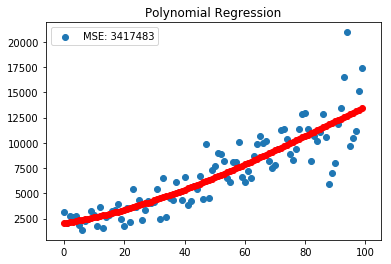

In [76]:
#Set the degree of the poly func
degree=3
poly = PolynomialFeatures(degree) # set degree
poly.fit(X)
X2 = poly.transform(X)

# Train
lin_reg = LinearRegression()
lin_reg.fit(X2, y)

#calculate MSE
y_pred = lin_reg.predict(X2)

MSE = mean_squared_error(y, y_pred)
MSE = int(MSE)
plt.scatter(x, y, label = f"MSE: {MSE}")
plt.scatter(x, y_pred, color = 'r')
plt.title('Polynomial Regression')
plt.legend(loc='best')
plt.show()

In [77]:
for num in lin_reg.coef_:
    print(num)

0.0
43.4358608616052
1.1566645051844824
-0.004423278392891916
